<u>**CMPE 482 - Assignment 6**<u>

**Name:** Badie M. Taye  
**Date of Submission:** Wednesday, July 02, 2021  

In [ ]:
import numpy as np 
import numpy.linalg as nl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import jax.numpy as jnp
# from jax import grad
# import math
# import sklearn.datasets

# Section I

Resources:
- https://math.stackexchange.com/questions/494238/how-to-compute-homography-matrix-h-from-corresponding-points-2d-2d-planar-homog
- https://cseweb.ucsd.edu/classes/sp04/cse252b/notes/lec02/lec2.pdf
- https://github.com/Hoya-kim/Image-warping-stitching:
- http://vision.cs.utexas.edu/378h-fall2015/slides/lecture14.pdf
- https://github.com/furkanc/Homograpy_dlt/blob/master/dlt.py
- https://www.uio.no/studier/emner/matnat/its/nedlagte-emner/UNIK4690/v16/forelesninger/lecture_4_3-estimating-homographies-from-feature-correspondences.pdf
- https://medium.com/all-things-about-robotics-and-computer-vision/homography-and-how-to-calculate-it-8abf3a13ddc5


- Biliear Interpolation: 
    - https://stackoverflow.com/questions/12729228/simple-efficient-bilinear-interpolation-of-images-in-numpy-and-python
    - https://www.programmersought.com/article/5591255951/
    - https://eng.aurelienpierre.com/2020/03/bilinear-interpolation-on-images-stored-as-python-numpy-ndarray/
    - https://github.com/YasinEnigma/Image_Interpolation

## Part (a):

In [ ]:
# Reading Images:
img_left = mpimg.imread("img_left.jpg")
img_right = mpimg.imread("img_right.jpg")

In [ ]:
# Reading Point Pairs:
p_left = np.load("points_left.npy")
p_right = np.load("points_right.npy")

In [ ]:
# print(img_left)
# print(img_right)

# print(p_left)
# print(p_right)

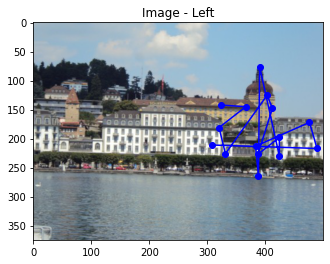

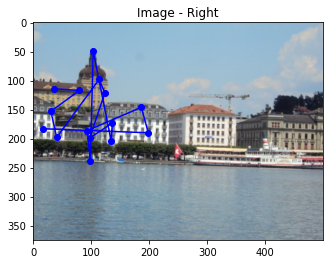

In [ ]:
# Plotting:
# Left Image:
plt.imshow(img_left)
plt.plot(p_left[0], p_left[1], color="b", marker="o")
plt.title("Image - Left")
plt.show()

# Right Image:
plt.imshow(img_right)
plt.plot(p_right[0], p_right[1], color="b", marker="o")
plt.title("Image - Right")
plt.show()


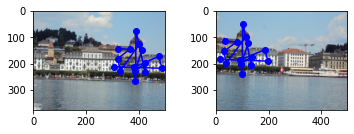

In [ ]:
# Plotting Images Sideway:
plt.subplot(2, 2, 1)
plt.imshow(img_left)
plt.plot(p_left[0], p_left[1], color="b", marker="o")

plt.subplot(2, 2, 2)
plt.imshow(img_right)
plt.plot(p_right[0], p_right[1], color="b", marker="o")

plt.show()

## Part (b):

### Solution:

$$
\left[\begin{array}{c}
i_{1} \\
j_{1} \\
1
\end{array}\right] \equiv\left[\begin{array}{l}
\tilde{i}_{1} \\
\tilde{j}_{1} \\
\tilde{k}_{1}
\end{array}\right]=\frac{1}{c} \cdot \left[\begin{array}{lll}
m_{11} & m_{12} & m_{13} \\
m_{21} & m_{22} & m_{23} \\
m_{31} & m_{32} & m_{33}^{\triangleright}
\end{array}\right]\left[\begin{array}{c}
i_{2} \\
j_{2} \\
1
\end{array}\right]
$$

For a given pair of corresponding points:

$$
\begin{array}{l}
i_{1}=\frac{\tilde{i}_{1}}{\tilde{k}_{1}}=\frac{m_{11} i_{2}+m_{12} j_{2}+m_{13}}{m_{31} i_{2}+m_{32} j_{2}+m_{33}} \\
j_{1}=\frac{\tilde{j}_{1}}{\tilde{k}_{1}}=\frac{m_{21} i_{2}+m_{22} j_{2}+m_{23}}{m_{31} i_{2}+m_{32} j_{2}+m_{33}}
\end{array}
$$

where the constant divides out in such an operation.


Rearranging Terms:

$$
\begin{array}{l}
i_{1}(m_{31} i_{2}+m_{32} j_{2}+m_{33})=m_{11} i_{2}+m_{12} j_{2}+m_{13} \\
j_{1}(m_{31} i_{2}+m_{32} j_{2}+m_{33})=m_{21} i_{2}+m_{22} j_{2}+m_{23}
\end{array}
$$

Rearranging Terms:
$$
\begin{array}{l}
m_{31} i_{2} i_{1}+m_{32} j_{2} i_{1}+m_{33} i_{1}-m_{11} i_{2}-m_{12} j_{2}-m_{13}=0 \\
m_{31} i_{2} j_{1}+m_{32} j_{2} j_{1}+m_{33} j_{1}-m_{21} i_{2}-m_{22} j_{2}-m_{23}=0
\end{array}
$$

Rearranging the terms, changing signs, and writing them as a linear equation:

$$
\left[\begin{array}{cccccccc}
i_{2} & j_{2} & 1 & 0 & 0 & 0 & -i_{1} i_{2} & -i_{1} j_{2} & -i_{1} \\
0 & 0 & 0 & i_{2} & j_{2} & 1 & -j_{1} i_{2} & -j_{1} j_{2} & -j_{1}
\end{array}\right]\left[\begin{array}{l}
m_{11} \\
m_{12} \\
m_{13} \\
m_{21} \\
m_{22} \\
m_{23} \\
m_{31} \\
m_{32} \\
m_{33}
\end{array}\right]=\left[\begin{array}{l}
0 \\
0
\end{array}\right]
$$



###  Another Version of the Same Solution:

#### Using Different Notation:
Let us solve the equation $H \widetilde{u}=\widetilde{u}^{\prime}$ for the entries of the homography matrix,  where H here denotes matrix $M$ in our assignment, $\widetilde{u}$ denotes point $p_{2}$, and $\widetilde{u}^{\prime}$ denotes point $p_{1}$ 
$$
\begin{array}{l}
H \widetilde{u}=\tilde{u}^{\prime} \\
{\left[\begin{array}{lll}
h_{1} & h_{2} & h_{3} \\
h_{4} & h_{5} & h_{6} \\
h_{7} & h_{8} & h_{9}
\end{array}\right]\left[\begin{array}{l}
u \\
v \\
1
\end{array}\right]=\left[\begin{array}{l}
u^{\prime} \\
v^{\prime} \\
1
\end{array}\right]}
\end{array}
$$

$$
\left[\begin{array}{lll}
h_{1} & h_{2} & h_{3} \\
h_{4} & h_{5} & h_{6} \\
h_{7} & h_{8} & h_{9}
\end{array}\right]\left[\begin{array}{l}
u \\
v \\
1
\end{array}\right]=\left[\begin{array}{l}
u^{\prime} \\
v^{\prime} \\
1
\end{array}\right] \Leftrightarrow\left\{\begin{array}{l}
u h_{1}+v h_{2}+h_{3}=u^{\prime} \\
u h_{4}+v h_{5}+h_{6}=v^{\prime} \\
u h_{7}+v h_{8}+h_{9}=1
\end{array}\right\} \Leftrightarrow\left[\begin{array}{ccccccccc}
0 & 0 & 0 & -u & -v & -1 & v^{\prime} u & v^{\prime} v & v^{\prime} \\
u & v & 1 & 0 & 0 & 0 & -u^{\prime} u & -u^{\prime} v & -u^{\prime} \\
-v^{\prime} u & -v^{\prime} v & -v^{\prime} & u^{\prime} u & u^{\prime} v & u^{\prime} & 0 & 0 & 0
\end{array}\right]\left[\begin{array}{l}
h_{1} \\
h_{2} \\
h_{3} \\
h_{4} \\
h_{5} \\
h_{6} \\
h_{7} \\
h_{8} \\
h_{9}
\end{array}\right]=\left[\begin{array}{c}
0 \\
0 \\
0
\end{array}\right] \Leftrightarrow A \mathbf{h}=\mathbf{0}
$$

The third row in 𝐴 is a linear combination of the first and second row:
$$
r o w_{3}=-u^{\prime} \cdot r o w_{1}-v^{\prime} \cdot r o w_{2}
$$

Hence every correspondence 𝒖𝑖 ↔ 𝒖′𝑖 contributes with 2 equations in the 9 unknown entries

## Part (c):

This is a Homogeneous Linear Least Squares’ problem with the form:

$$
\left[\begin{array}{ccccccccc}
x_{1} & y_{1} & 1 & 0 & 0 & 0 & -x_{1} x_{1}^{\prime} & -y_{1} x_{1}^{\prime} & -x_{1}^{\prime} \\
0 & 0 & 0 & x_{1} & y_{1} & 1 & -x_{1} y_{1}^{\prime} & -y_{1} y_{1}^{\prime} & -y_{1}^{\prime} \\
x_{2} & y_{2} & 1 & 0 & 0 & 0 & -x_{2} x_{2}^{\prime} & -y_{2} x_{2}^{\prime} & -x_{2}^{\prime} \\
0 & 0 & 0 & x_{2} & y_{2} & 1 & -x_{2} y_{2}^{\prime} & -y_{2} y_{2}^{\prime} & -y_{2}^{\prime} \\
& \vdots & & \vdots & & \vdots & & \vdots &
\end{array}\right]\left[\begin{array}{l}
m_{1} \\
m_{2} \\
m_{3} \\
m_{4} \\
m_{5} \\
m_{6} \\
m_{7} \\
m_{8} \\
m_{9}
\end{array}\right]=\mathbf{0}
$$

where each $(x_{n}, y_{n})$ and $(x_{n}^{\prime}, y_{n}^{\prime})$ represent a single point corespondence.

The problem could be solved with SVD:
$$
\mathbf{A}=\mathbf{U} \mathbf{\Sigma} \mathbf{V}^{\top}
$$

$$
=\sum_{i=1}^{9} \sigma_{i} \boldsymbol{u}_{i} \boldsymbol{v}_{i}^{\top}
$$

Each column of V represents a solution for $Ah = 0$ where the eigenvalues represent the reprojection error.

General form of total least squares (x is used here as a vector of parameters):
$$
\begin{aligned}
E_{\mathrm{TLS}} &=\sum_{i}\left(\boldsymbol{a}_{i} \boldsymbol{x}\right)^{2} \\
&=\|\mathbf{A} \boldsymbol{x}\|^{2}
\end{aligned}
$$

with constraint:
$$\| \boldsymbol{x}\|^{2} = 1$$

Then:
$$
\text { min } \frac{\|\mathbf{A} \boldsymbol{x}\|^{2}}{\|\boldsymbol{x}\|^{2}}
$$

Thus, the solution is the eigenvector corresponding to smallest eigenvalue of $A^{\top}A$. Hence, the solution is the column of V corresponding to the smallest singular value.

## Part(d):

**Approach to Solving for M:**  
Given $(i_{1}, j_{1}), (i_{2}, j_{2})$, we need to solve for M such that $x^{'}=Mx$

1. For each correspondence, create 2x9 matrix $A_i$
2. Concatenate into single 2n x 9 matrix A
3. Compute SVD of A
4. Store Eigenvector of the smallest Eigenvalue: $m = v_{i}$
5. Reshape to get M

In [ ]:
i_1 = p_left[0]
j_1 = p_left[1]

print("i_1:", p_left[0])
print("j_1:", p_left[1])

i_1: [323 366 320 331 403 412 387 424 424 390 388 383 476 489 307]
j_1: [142 145 181 226 125 148 227 198 230  76 265 213 172 217 211]


In [ ]:
i_2 = p_right[0]
j_2 = p_right[1]

print("i_2:", p_right[0])
print("j_2:", p_right[1])

i_2: [ 36  79  30  40 113 123  97 136 134 103  98  93 186 198  17]
j_2: [114 117 153 198  98 121 199 173 204  49 239 186 146 190 183]


In [ ]:
x = i_1
for i in i_2:
    x = np.append(x, i)
print(x)

y = j_1
for j in j_2:
    y = np.append(y, j)
    

[323 366 320 331 403 412 387 424 424 390 388 383 476 489 307  36  79  30
  40 113 123  97 136 134 103  98  93 186 198  17]


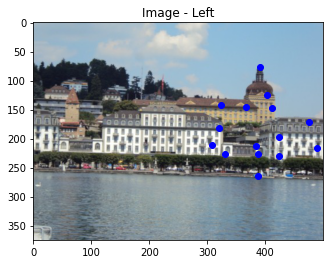

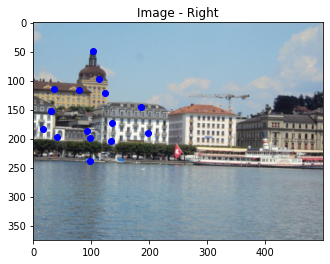

In [ ]:
# Plotting Corresponding Points:
# Left Image:
plt.imshow(img_left)
for i in range(len(i_1)):
    plt.scatter(i_1[i], j_1[i], marker="o", color="b")

plt.title("Image - Left")
plt.show()

# Right Image:
plt.imshow(img_right)
for i in range(len(i_2)):
    plt.scatter(i_2[i], j_2[i], marker="o", color="b")

plt.title("Image - Right")
plt.show()


---

In [ ]:
print("i_1:", p_left[0])
print("j_1:", p_left[1])
print("i_2:", p_right[0])
print("j_2:", p_right[1])

i_1: [323 366 320 331 403 412 387 424 424 390 388 383 476 489 307]
j_1: [142 145 181 226 125 148 227 198 230  76 265 213 172 217 211]
i_2: [ 36  79  30  40 113 123  97 136 134 103  98  93 186 198  17]
j_2: [114 117 153 198  98 121 199 173 204  49 239 186 146 190 183]


In [ ]:
# Setting matching points in first image:
xy_1 = []
for i in range(15):
    xy_1.append([i_1[i], j_1[i]])
    
# Setting matching points in second image:
xy_2 = []
for i in range(15):
    xy_2.append([i_2[i], j_2[i]])
    
#print(xy_1)
#print()
#print(xy_2)


$$
\left[\begin{array}{ccccccccc}
x_{1} & y_{1} & 1 & 0 & 0 & 0 & -x_{1} x_{1}^{\prime} & -y_{1} x_{1}^{\prime} & -x_{1}^{\prime} \\
0 & 0 & 0 & x_{1} & y_{1} & 1 & -x_{1} y_{1}^{\prime} & -y_{1} y_{1}^{\prime} & -y_{1}^{\prime} \\
x_{2} & y_{2} & 1 & 0 & 0 & 0 & -x_{2} x_{2}^{\prime} & -y_{2} x_{2}^{\prime} & -x_{2}^{\prime} \\
0 & 0 & 0 & x_{2} & y_{2} & 1 & -x_{2} y_{2}^{\prime} & -y_{2} y_{2}^{\prime} & -y_{2}^{\prime} \\
& \vdots & & \vdots & & \vdots & & \vdots &
\end{array}\right]\left[\begin{array}{l}
m_{1} \\
m_{2} \\
m_{3} \\
m_{4} \\
m_{5} \\
m_{6} \\
m_{7} \\
m_{8} \\
m_{9}
\end{array}\right]=\mathbf{0}
$$


In [ ]:
p1 = xy_1
p2 = xy_2

In [ ]:
'''
A = []
for i in range(15):
    A.append([xy_1[i][0], xy_1[i][1], 1, 0, 0, 0, -xy_1[i][0] * xy_2[i][0], -xy_2[i][0] * xy_1[i][1], -xy_2[i][0]])
    A.append([0, 0, 0, xy_1[i][0], xy_1[i][1], 1, -xy_1[i][0] * xy_2[i][1], -xy_2[i][1] * xy_1[i][1], -xy_2[i][1]])
'''

'''
# A cleaner version:
A = []
for i in range(0, len(p1)):
    x, y = p1[i][0], p1[i][1]
    u, v = p2[i][0], p2[i][1]
    A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
    A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
'''

'\n# A cleaner version:\nA = []\nfor i in range(0, len(p1)):\n    x, y = p1[i][0], p1[i][1]\n    u, v = p2[i][0], p2[i][1]\n    A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])\n    A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])\n'

In [ ]:
def computeA(t1, t2):
    """
    Arguments:
        t1 (ndarray): Points in Image 1 (2xN).
        t2 (ndarray): Corresponding points in Image 2 (2xN).
    Returns:
        ndarray: 2n x 9 matrix A.
    """

    n = len(t1)
    A = []
    n -= 1
    while n is not -1:
        A.append([t1[n][0], t1[n][1], 1, 0, 0, 0, -t2[n][0] * t1[n][0], -t2[n][0] * t1[n][1], -t2[n][0]])
        A.append([0, 0, 0, t1[n][0], t1[n][1], 1, -t2[n][1] * t1[n][0], -t2[n][1] * t1[n][1], -t2[n][1]])
        n -= 1
    A=np.asarray(A)
    
    return A

<>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-1002-2a5da320bbbf>:13: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  while n is not -1:


In [ ]:
A = computeA(p2, p1)

In [ ]:
np.shape(A)

(30, 9)

In [ ]:
print(A)

[[    17    183      1      0      0      0  -5219 -56181   -307]
 [     0      0      0     17    183      1  -3587 -38613   -211]
 [   198    190      1      0      0      0 -96822 -92910   -489]
 [     0      0      0    198    190      1 -42966 -41230   -217]
 [   186    146      1      0      0      0 -88536 -69496   -476]
 [     0      0      0    186    146      1 -31992 -25112   -172]
 [    93    186      1      0      0      0 -35619 -71238   -383]
 [     0      0      0     93    186      1 -19809 -39618   -213]
 [    98    239      1      0      0      0 -38024 -92732   -388]
 [     0      0      0     98    239      1 -25970 -63335   -265]
 [   103     49      1      0      0      0 -40170 -19110   -390]
 [     0      0      0    103     49      1  -7828  -3724    -76]
 [   134    204      1      0      0      0 -56816 -86496   -424]
 [     0      0      0    134    204      1 -30820 -46920   -230]
 [   136    173      1      0      0      0 -57664 -73352   -424]
 [     0  

In [ ]:
# SVD:
u, s, vh = nl.svd(A, full_matrices=True)
print("Shape of Data Matrix A:", A.shape)
print("Shape of U:", u.shape)
print("Shape of Singular Values Array:", s.shape)
print("Shape of V*:", vh.shape)

Shape of Data Matrix A: (30, 9)
Shape of U: (30, 30)
Shape of Singular Values Array: (9,)
Shape of V*: (9, 9)


In [ ]:
m = vh[-1,:]
M = np.reshape(m,(3,3))
M /= M[-1][-1]

In [ ]:
print(M)

[[ 9.59996748e-01  5.29774709e-02  2.85711634e+02]
 [-3.50871229e-02  1.01431435e+00  2.90062403e+01]
 [-1.18680817e-04  9.21394725e-05  1.00000000e+00]]


---

# Section II:

## Part (a):

In [ ]:
# Mesh-grid 1:
grid_x_1, grid_y_1 = np.mgrid[0:374:75j, 0:499:100j]
print(grid_x_1.shape)
print(grid_y_1.shape)

#print("\n\n")

# Mesh-grid 2:
grid_x_2, grid_y_2 = np.mgrid[0:250:501j, 0:300:601j]
#print(grid_x_2)
#print(grid_y_2)

#print("\n\n")

# Mesh-grid 3:
grid_x_3, grid_y_3 = np.mgrid[-100:475:250j, -100:600:250j]
#print(grid_x_3)
#print(grid_y_3)


(75, 100)
(75, 100)


In [ ]:
# Mesh-grid 1:
grid_x_1, grid_y_1 = np.mgrid[0:374:75j, 0:499:100j]
print(grid_x_1.shape)
print(grid_y_1.shape)

#print("\n\n")

# Mesh-grid 2:
grid_x_2, grid_y_2 = np.mgrid[0:250:501j, 0:300:601j]
print(grid_x_2.shape)
print(grid_y_2.shape)

#print("\n\n")

# Mesh-grid 3:
grid_x_3, grid_y_3 = np.mgrid[-100:475:250j, -100:600:250j]
print(grid_x_3.shape)
print(grid_y_3.shape)

(75, 100)
(75, 100)
(501, 601)
(501, 601)
(250, 250)
(250, 250)


## Part (b):

In [ ]:
print(img_right.shape)
print(img_left.shape)

(375, 500, 3)
(375, 500, 3)


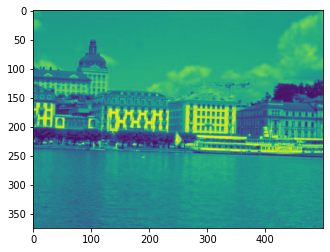

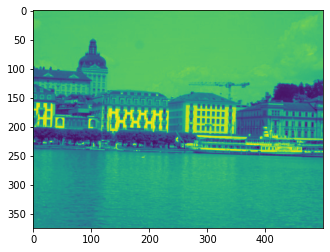

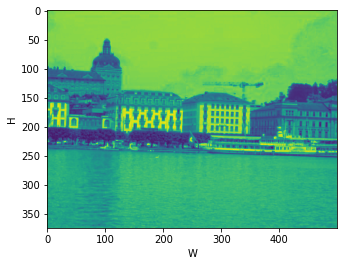

In [ ]:
# Understanding Pixels (Working on right image):

# Red values of the image:
r = img_right[:, :, 0]
plt.imshow(r)
plt.show()

# Blue values of the image:
b = img_right[:, :, 1]
plt.imshow(b)
plt.show()

# Green values of the image:
g = img_right[:, :, 2]
plt.imshow(g)
plt.xlabel("W")
plt.ylabel("H")
plt.show()


In [ ]:
# Colors of a single pixel:
# Colors of last pixel on W = 0
img_right[374, 0, :]

array([170, 183, 200], dtype=uint8)

In [ ]:
# Coordinates of a the pixel: (374, 0)
img_right[374, 0]

array([170, 183, 200], dtype=uint8)

In [ ]:
# a with respect to first point on right image:
a = np.array([
    [1, 0, 0], 
    [1, 0, 1], 
    [1, 1, 0], 
    [1, 1, 1]
])
print(a)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


In [ ]:
# Color:
b = np.array([
    img_right[a[0, 1], a[0, 2]],
    img_right[a[1, 1], a[1, 2]],
    img_right[a[2, 1], a[2, 2]], 
    img_right[a[3, 1], a[3, 2]],
])
print(b)

[[236 240 241]
 [214 218 219]
 [213 219 219]
 [186 194 196]]


In [ ]:
# Computing v:
v = sl.lstsq(a, b)[0]
v

array([[237.25, 240.75, 241.25],
       [-25.5 , -22.5 , -22.5 ],
       [-24.5 , -23.5 , -22.5 ]])

In [ ]:
# Checking:
a @ v

array([[237.25, 240.75, 241.25],
       [212.75, 217.25, 218.75],
       [211.75, 218.25, 218.75],
       [187.25, 194.75, 196.25]])

In [ ]:
I_new = []

for y in range(0, 374):
    for x in range(0, 499):
        pixel = np.array([[1, y, x]])
        
        # a with respect to first point on right image:
        a = np.array([
            [1, y, x], 
            [1, y, x+1], 
            [1, y+1, x], 
            [1, y+1, x+1]
        ])
        
        # b for colors of pixels:
        b = np.array([
            img_right[a[0, 1], a[0, 2]],
            img_right[a[1, 1], a[1, 2]],
            img_right[a[2, 1], a[2, 2]], 
            img_right[a[3, 1], a[3, 2]],
        ])
                          
        v = sl.lstsq(a, b)[0]
                                           
        c = pixel @ v
        I_new.append(c)

I_new

[array([[237.25, 240.75, 241.25]]),
 array([[214.5 , 218.25, 220.  ]]),
 array([[215.75, 221.5 , 225.25]]),
 array([[212.5 , 221.25, 228.  ]]),
 array([[205.  , 215.25, 224.5 ]]),
 array([[206.  , 218.5 , 230.25]]),
 array([[202.75, 216.  , 229.25]]),
 array([[202.25, 216.  , 231.5 ]]),
 array([[201.25, 217.  , 232.25]]),
 array([[197.75, 214.25, 229.5 ]]),
 array([[195.  , 213.75, 231.5 ]]),
 array([[193., 215., 236.]]),
 array([[190., 216., 239.]]),
 array([[184.  , 214.  , 240.25]]),
 array([[180.25, 214.25, 242.  ]]),
 array([[180.25, 215.25, 243.25]]),
 array([[180., 215., 243.]]),
 array([[180., 215., 243.]]),
 array([[180., 215., 243.]]),
 array([[179.75, 214.75, 242.75]]),
 array([[179., 214., 242.]]),
 array([[179.25, 214.25, 242.25]]),
 array([[179., 214., 242.]]),
 array([[179., 214., 242.]]),
 array([[180., 215., 243.]]),
 array([[180., 215., 243.]]),
 array([[180., 215., 243.]]),
 array([[180., 215., 243.]]),
 array([[180., 215., 243.]]),
 array([[180., 215., 243.]]),
 arr

# Section III:

## Part (a):

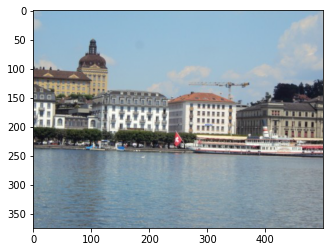

In [ ]:
plt.imshow(img_right)
plt.show()

In [ ]:
img_right.shape

(375, 500, 3)

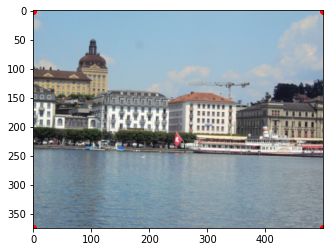

In [ ]:
plt.imshow(img_right)
plt.scatter(0, 0, color="r")
plt.scatter(499, 0, color="r")
plt.scatter(499, 374, color="r")
plt.scatter(0, 374, color="r")
plt.show()

In [ ]:
# Upper Left:
r1 = M@np.array([
    [0], [0], [1]
])
print(r1)

[[285.71163366]
 [ 29.00624027]
 [  1.        ]]


In [ ]:
# Upper Right:
r2 = M@np.array([
    [499], [0], [1]
])
print(r2)

[[764.75001094]
 [ 11.49776595]
 [  0.94077827]]


In [ ]:
# Lower Right:
r3 = M@np.array([
    [499], [374], [1]
])
print(r3)

[[784.56358506]
 [390.8513311 ]
 [  0.97523844]]


In [ ]:
# Lower Left:
r4 = M@np.array([
    [0], [374], [1]
])
print(r4)

[[305.52520778]
 [408.35980543]
 [  1.03446016]]


In [ ]:
# Upper Left:
print("Upper Left Coordinates:", "(", r1[1][0], r1[0][0], ")")

Upper Left Coordinates: ( 29.006240273212164 285.7116336577007 )


In [ ]:
# Lower Right:
print("Lower Right Coordinates:", "(", r3[1][0], r3[0][0], ")")

Lower Right Coordinates: ( 390.85133110339314 784.5635850569724 )


## Part (b):

In [ ]:
def grid(min_x, min_y, max_x, max_y, split_grid_x=1, split_grid_y=1):
    """
    Upper Left: (min_x, min_y)
    Lower Right: (max_x, max_y)
    """
    x = np.linspace(min_x, max_x, split_grid_x)
    y = np.linspace(min_y, max_y, split_grid_y)
    xv, yv = np.meshgrid(x, y)
    return xv, yv

In [ ]:
xv, yv = grid(14, 285, 398, 810, 1, 1)

## Part (c) & Part (d):

In [ ]:
m = vh[-1,:]
M = np.reshape(m,(3,3))
M /= M[-1][-1]
print(M)

[[ 9.59996748e-01  5.29774709e-02  2.85711634e+02]
 [-3.50871229e-02  1.01431435e+00  2.90062403e+01]
 [-1.18680817e-04  9.21394725e-05  1.00000000e+00]]


In [ ]:
def warpImage(I1, I2, M):
    """ Warps I1 onto I2 using M
    Args:
        I1 (ndarray): Image to be warped.
        I2 (ndarray): Reference Image.
        M: Homography matrix obtained from question 1.
    Returns:
        (ndarray, ndarray): Returns the warped version of the input image and
        the warped input image on the reference image.
    """

    M_inv = nl.inv(M)
    inputH, inputW, c = I1.shape
    outputH, outputW, c = I2.shape
    min_x = float("inf")
    min_y = float("inf")
    max_x = float("-inf")
    max_y = float("-inf")
    cornersi =  [(0,0), (inputH, inputW), (0, inputW), (inputH, 0)]
    cornerso =  [(0,0), (inputH, inputW), (0, inputW), (inputH, 0)]
    for i,j in cornersi:
            x, y, w = np.matmul(M, [j , i, 1])
            x = x/w
            y = y/w
            if x > max_x:
                max_x = int(x)
            if x < min_x:
                min_x = int(x)
            if y > max_y:
                max_y = int(y)
            if y < min_y:
                min_y = int(y)
    warpIm = np.zeros((max_y - min_y,max_x - min_x, 3))
    for i in range(0, max_x - min_x):
        for j in range (0, max_y - min_y):
            x, y, w = np.matmul(M_inv, [i + min_x, j + min_y, 1])
            x = int(x/w)
            y = int(y/w)
            a = 0
            b = 0
            c = 0
            if not (y < 0 or y >= inputH or x < 0 or x >= inputW):
                a, b, c = I1[y, x, :]
            warpIm[j, i, :] = [a/255, b/255, c/255]
    oldx = min_x
    oldy = min_y
    oldmx = max_x
    oldmy = max_y
    for i,j in cornerso:
        if j > max_x:
            max_x = int(j)
        if j < min_x:
            min_x = int(j)
        if i > max_y:
            max_y = int(i)
        if i < min_y:
            min_y = int(i)
    mergeIm = np.zeros(((max_y - min_y),(max_x - min_x), 3))
    for i in range(min_x, max_x):
        for j in range (min_y, max_y):
            a = 0
            b = 0
            c = 0
            if not (j < oldy or j >= oldmy or i < oldx or i >= oldmx):
                a, b, c = warpIm[j - oldy, i - oldx, :]
                if a == 0.0 or b == 0.0 or c == 0.0:
                    if not (j < 0 or j >= outputH or i < 0 or i >= outputW):
                        a, b, c = I2[j, i, :]/255
            else:
                if not (j < 0 or j >= outputH or i < 0 or i >= outputW):
                    a, b, c = I2[j, i, :]/255
            mergeIm[j - min_y, i- min_x, :] = [a, b, c]
            
    return (warpIm, mergeIm)

In [ ]:
warpIm, mergeIm = warpImage(img_right, img_left, M)

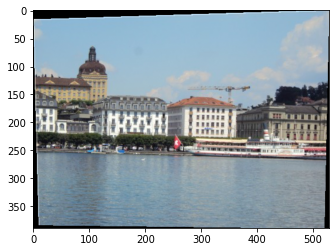

In [ ]:
plt.imshow(warpIm)
plt.show()

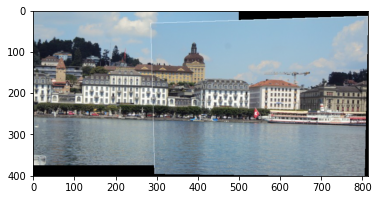

In [ ]:
plt.imshow(mergeIm)
plt.show()